<a href="https://colab.research.google.com/github/Satyamaadi/python/blob/master/Basic_ops_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading and converting image to batch

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt


In [4]:
from skimage import io

In [5]:
img = io.imread('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-TensorFlow-2/master/Chapter03/res/bird_pic_by_benjamin_planche.png')

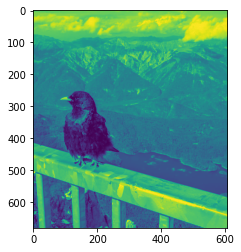

In [5]:
plt.imshow(img)

In [6]:
img1 = tf.convert_to_tensor(img,tf.float32,name='input_img')

In [7]:
img1 = tf.expand_dims(img1,axis=0)

In [8]:
img1 = tf.expand_dims(img1,axis=-1)

In [9]:
img1.shape

TensorShape([1, 680, 608, 1])

##Convolutions

###Filter for blurring images

In [10]:
kernel = tf.constant([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]],tf.float32,name='blur_filter')

In [11]:
kernel = tf.expand_dims(tf.expand_dims(kernel,axis=-1),axis=-1)

In [12]:
blur = tf.nn.conv2d(img1,kernel,strides=[1,1,1,1],padding='SAME')

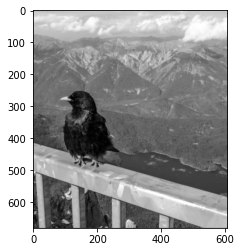

In [13]:
blurred_res = blur.numpy()
# We "unbatch" our result by selecting the first (and only) image; we also remove the depth dimension:
blurred_res = blurred_res[0, ..., 0]

plt.imshow(blurred_res, cmap=plt.cm.gray)

##Contour detection

In [10]:
kernel = tf.constant([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],tf.float32,name='edge_detection')

In [11]:
kernel = tf.expand_dims(tf.expand_dims(kernel,axis=-1),axis=-1)

In [12]:
edge_image = tf.nn.conv2d(img1,kernel,strides=[1,2,2,1],padding='SAME')

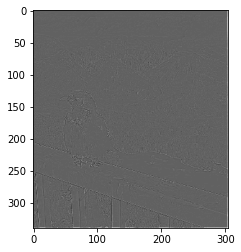

In [13]:
edge_res = edge_image.numpy()[0, ..., 0]
plt.imshow(edge_res, cmap=plt.cm.gray)

##Pooling

In [14]:
avg_pool_image = tf.nn.avg_pool(img1,ksize=[1,2,2,1],strides=[1,2,2,1],name='average_pool',padding='SAME')

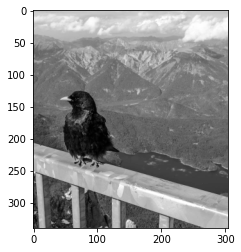

In [15]:
avg_res = avg_pool_image.numpy()[0, ..., 0]
plt.imshow(avg_res, cmap=plt.cm.gray)

In [ ]:
max_pool = tf.nn.max_pool(img1,ksize=[1,10,10,1],strides=[1,2,2,1],padding='SAME',name='Max_pool')

In [ ]:
max_pool_img = max_pool.numpy()[0,...,0]

In [ ]:
plt.imshow(max_pool_img)